## Plotting in Pandas

Pandas includes methods for DataFrame and Series objects that are relatively high-level, and that make reasonable assumptions about how the plot should look.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Set some Pandas options
# pd.set_option('display.notebook_repr_html', False)
# pd.set_option('display.max_columns', 20)
# pd.set_option('display.max_rows', 25)

<AxesSubplot:>

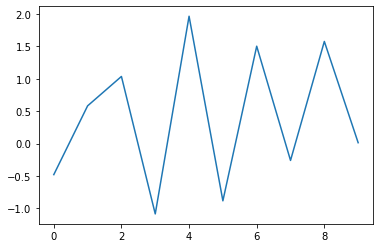

In [2]:
normals = pd.Series(np.random.normal(size=10))
normals.plot()

For a dataframe

<AxesSubplot:>

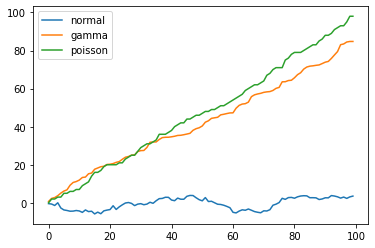

In [3]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
variables.cumsum(0).plot()

As an illustration of the high-level nature of Pandas plots, we can split multiple series into subplots with a single argument for plot:

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

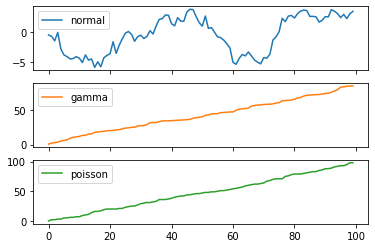

In [4]:
variables.cumsum(0).plot(subplots=True)

Or, we may want to have some series displayed on the secondary y-axis, which can allow for greater detail and less empty space:


<AxesSubplot:>

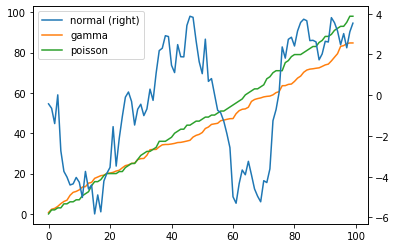

In [5]:
variables.cumsum(0).plot(secondary_y='normal')

If we would like a little more control, we can use matplotlib's subplots function directly, and manually assign plots to its axes:

Text(0, 0.5, 'cumulative sum')

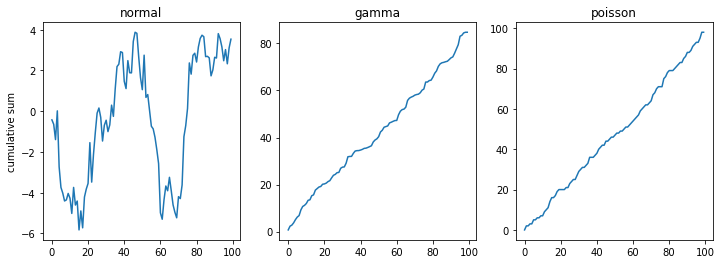

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum')

For labeled, non-time series data, you may wish to produce a bar plot:

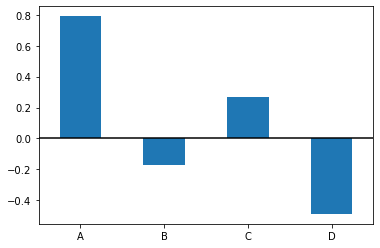

In [9]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df.iloc[5].plot(kind='bar', rot=0)
plt.axhline(0, color='k')

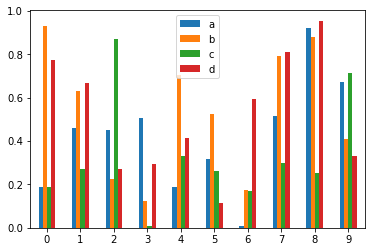

In [10]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot(kind='bar', rot=0);

#### Stacked

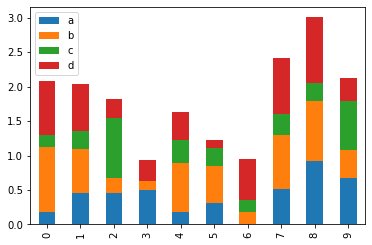

In [11]:
df2.plot(kind='bar', stacked=True);

#### Histogram

In [14]:
print(pd.__version__)

1.2.4


<AxesSubplot:ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

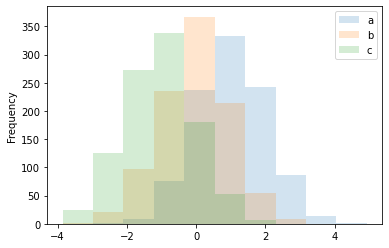

In [15]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000), 'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
plt.figure()
df4.plot(kind='hist', alpha=.2)

<AxesSubplot:ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

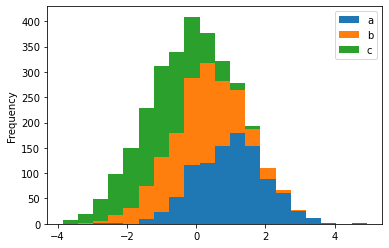

In [16]:
plt.figure()

df4.plot(kind='hist', stacked=True, bins=20)

#### Box Plots

<AxesSubplot:>

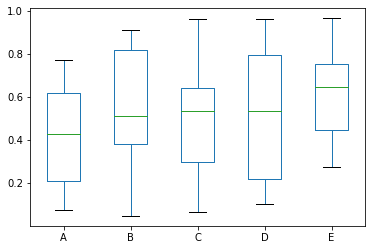

In [17]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])

df.plot(kind='box')

#### Area

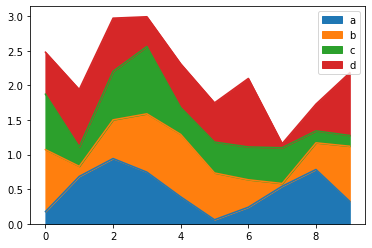

In [18]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df.plot(kind='area');

#### Scatter

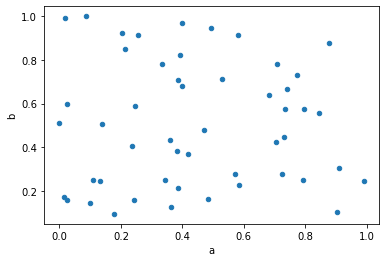

In [19]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

df.plot(kind='scatter', x='a', y='b');


#### Pie

array([<AxesSubplot:ylabel='x'>, <AxesSubplot:ylabel='y'>], dtype=object)

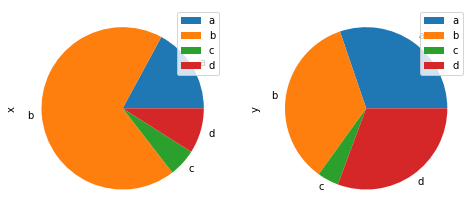

In [20]:
df = pd.DataFrame(3 * np.random.rand(4, 2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])

df.plot(kind='pie', subplots=True, figsize=(8, 4))

#### Kernel Density Estimation - KDE

<AxesSubplot:ylabel='Density'>

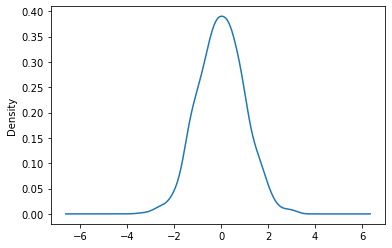

In [21]:
ser = pd.Series(np.random.randn(1000))

ser.plot(kind='kde')

#### Histogram with KDE

<AxesSubplot:ylabel='Density'>

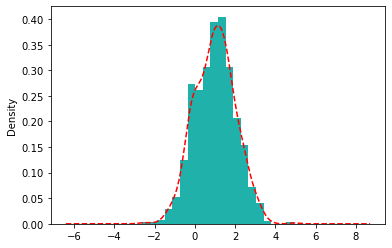

In [24]:
df4.a.hist(bins=20, density=True, color='lightseagreen')
df4.a.plot(kind='kde', style='r--')

#### Scatter Matrix

array([[<AxesSubplot:xlabel='a', ylabel='a'>,
        <AxesSubplot:xlabel='b', ylabel='a'>,
        <AxesSubplot:xlabel='c', ylabel='a'>,
        <AxesSubplot:xlabel='d', ylabel='a'>],
       [<AxesSubplot:xlabel='a', ylabel='b'>,
        <AxesSubplot:xlabel='b', ylabel='b'>,
        <AxesSubplot:xlabel='c', ylabel='b'>,
        <AxesSubplot:xlabel='d', ylabel='b'>],
       [<AxesSubplot:xlabel='a', ylabel='c'>,
        <AxesSubplot:xlabel='b', ylabel='c'>,
        <AxesSubplot:xlabel='c', ylabel='c'>,
        <AxesSubplot:xlabel='d', ylabel='c'>],
       [<AxesSubplot:xlabel='a', ylabel='d'>,
        <AxesSubplot:xlabel='b', ylabel='d'>,
        <AxesSubplot:xlabel='c', ylabel='d'>,
        <AxesSubplot:xlabel='d', ylabel='d'>]], dtype=object)

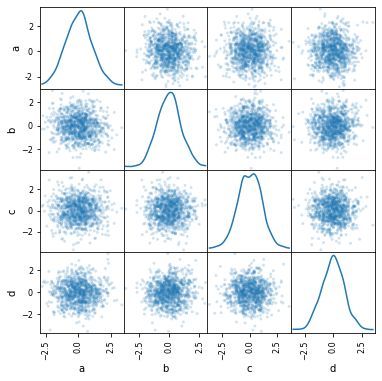

In [26]:
from pandas.plotting import scatter_matrix

df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])

scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')